# Желтое такси нью-йоркских улиц...

<br>
<br>
<br>
 <div style="text-align: right">*О-о-о-оооо, зеленоглазое такси...* <cite>**М.Боярский**</cite></div>

Начнем. С вашего позволения, я не буду делить документ на подразделы. Некоторые из них плавно перетекают друг в друга, не хочется этим голову забивать. И текста будет не очень много, вы ведь и так знакомы с заданием. Есть вещи, которые явно можно как-то прооптимизировать, но увы, в разумные сроки мне этого сделать не удалось =( 
<br>
*Важные моменты* и **пункты** по заданию я буду выделять 

Итак, подключим библиотеки и загрузим данные за май 2016:

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats

In [2]:
data = pd.read_csv('yellow_tripdata_2016-05.csv')

In [3]:
data.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
5,2,2016-05-01 00:00:00,2016-05-01 00:05:19,2,0.63,-73.979294,40.755764,1,N,-73.988014,40.758469,1,5.0,0.5,0.5,0.00,0.0,0.3,6.30
6,2,2016-05-01 00:00:00,2016-05-01 00:15:43,1,6.68,-73.981544,40.780739,1,N,-73.937805,40.855343,1,20.5,0.5,0.5,2.00,0.0,0.3,23.80
7,2,2016-05-01 00:00:00,2016-05-01 00:06:31,1,1.48,-73.987198,40.750507,1,N,-73.980797,40.767826,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96
8,2,2016-05-01 00:00:00,2016-05-01 00:00:00,4,1.59,-74.001610,40.740990,1,N,-73.981079,40.730675,1,8.0,0.5,0.5,0.00,0.0,0.3,9.30
9,2,2016-05-01 00:00:00,2016-05-01 00:00:00,3,3.52,-74.013855,40.714119,1,N,-73.994049,40.761452,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30


In [4]:
data.shape 

(11836853, 19)

Удалим поездки с **нулевым количеством пассажиров, нулевым расстоянием и нулевой длительностью **. А также, после удаления будем следить за количеством оставшихся записей.

In [5]:
data = data.drop(data[(data['passenger_count'] ==0) | (data['trip_distance'] == 0)].index)
data = data.drop(data[data['tpep_pickup_datetime'] == data['tpep_dropoff_datetime']].index)

In [6]:
data.shape 

(11763422, 19)

Удалим данные ** с координатами начала, не попадающими в прямоугольник Нью-Йорка**:

In [7]:
data = data.drop(data[(data['pickup_longitude'] <  -74.25559) | (data['pickup_longitude'] >  -73.70001) | 
                      (data['pickup_latitude'] <  40.49612) | (data['pickup_latitude'] >  40.91553)].index )

In [8]:
data.shape

(11626521, 19)

Разобъем Нью-Йорк на 2500 сегментов и посмотрим на данные. Зачем нужно *expand_binnumbers=True *объясню позже:

In [124]:
binned_data = stats.binned_statistic_2d(data['pickup_longitude'],data['pickup_latitude'],
                                        None, 'count', bins=50, range=[[-74.25559, -73.70001], [40.49612, 40.91553]], 
                                        expand_binnumbers=True)
binned_data

BinnedStatistic2dResult(statistic=array([[0., 0., 0., ..., 0., 5., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), x_edge=array([-74.25559  , -74.2444784, -74.2333668, -74.2222552, -74.2111436,
       -74.200032 , -74.1889204, -74.1778088, -74.1666972, -74.1555856,
       -74.144474 , -74.1333624, -74.1222508, -74.1111392, -74.1000276,
       -74.088916 , -74.0778044, -74.0666928, -74.0555812, -74.0444696,
       -74.033358 , -74.0222464, -74.0111348, -74.0000232, -73.9889116,
       -73.9778   , -73.9666884, -73.9555768, -73.9444652, -73.9333536,
       -73.922242 , -73.9111304, -73.9000188, -73.8889072, -73.8777956,
       -73.866684 , -73.8555724, -73.8444608, -73.8333492, -73.8222376,
       -73.811126 , -73.8000144, -73.7889028, -73.7777912, -73.7666796,
       -73.755568 , -73.7444564, -73.7333448, -73.7222332, -73.711121

Загрузим данные *regions* и тоже на них взглянем:

In [125]:
regions_data = pd.read_csv('regions.csv', delimiter=';')
regions_data.head(10)

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061
5,6,-74.25559,-74.244478,40.538061,40.546449
6,7,-74.25559,-74.244478,40.546449,40.554837
7,8,-74.25559,-74.244478,40.554837,40.563226
8,9,-74.25559,-74.244478,40.563226,40.571614
9,10,-74.25559,-74.244478,40.571614,40.580002


Соответствие между binned_statistic_2d и загруженными regions получилось сделать только при помощи *expand_binnumbers=True*. При других способах деление происходило неправильно! Ниже процедура, которое делает "правильное" обозначение регионов:

In [13]:
districts = []
for i in range(0,binned_data.binnumber[1].size):
    districts.append((binned_data.binnumber[0][i]-1)*50 + binned_data.binnumber[1][i])

Хорошо. Теперь составим таблицу в какое время из какого района был заказ. Для начала обрежем время каждого дня по самые.. часы =) Потом добавим столбец районов и посмотрим что из этого вышло: 

In [127]:
a = pd.to_datetime(data['tpep_pickup_datetime'])
a = a.dt.floor('h')
a_df = a.to_frame()
a_df['district'] = districts
a_df.head(10)

,tpep_pickup_datetime,district
0,2016-05-01,1233
1,2016-05-01,1180
2,2016-05-01,1180
3,2016-05-01,1173
4,2016-05-01,1130
5,2016-05-01,1231
6,2016-05-01,1234
7,2016-05-01,1231
11,2016-05-01,1384
12,2016-05-01,1228


Отлично! Но дальше - интереснее. Чтобы сделать так, что непредставленные районы в сырых данных тоже были в агрегирующей таблице, проделаем следующие трюки. Зададим категориальные данные с указанием количества категорий для районов равным 2500. И собственно сделаем кросс-таблицу:

In [106]:
districts_categories = range(0,2500,1)
dt_categorical = pd.Categorical(a_df.tpep_pickup_datetime, categories=sorted(a_df.tpep_pickup_datetime.unique()))
distr_categorical = pd.Categorical(a_df.district, categories=districts_categories)
cr_tab = pd.crosstab(dt_categorical, distr_categorical)


Взглянем на первые ее строки(полностью):

In [136]:
pd.set_option('display.max_columns', None)
cr_tab.head()

col_0                0     1     2     3     4     5     6     7     8     \
row_0                                                                       
2016-05-01 00:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 01:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 02:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 03:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 04:00:00     0     0     0     0     0     0     0     0     0   

col_0                9     10    11    12    13    14    15    16    17    \
row_0                                                                       
2016-05-01 00:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 01:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 02:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 03:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 04:00:00     0     0     0     0     0     0     0     0     0   

col_0                18    19    20    21    22    23    24    25    26    \
row_0                                                                       
2016-05-01 00:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 01:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 02:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 03:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 04:00:00     0     0     0     0     0     0     0     0     0   

col_0                27    28    29    30    31    32    33    34    35    \
row_0                                                                       
2016-05-01 00:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 01:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 02:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 03:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 04:00:00     0     0     0     0     0     0     0     0     0   

col_0                36    37    38    39    40    41    42    43    44    \
row_0                                                                       
2016-05-01 00:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 01:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 02:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 03:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 04:00:00     0     0     0     0     0     0     0     0     0   

col_0                45    46    47    48    49    50    51    52    53    \
row_0                                                                       
2016-05-01 00:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 01:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 02:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 03:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 04:00:00     0     0     0     0     0     0     0     0     0   

col_0                54    55    56    57    58    59    60    61    62    \
row_0                                                                       
2016-05-01 00:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 01:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 02:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 03:00:00     0     0     0     0     0     0     0     0     0   
2016-05-01 04:00:00     0     0     0     0     0     0     0     0     0   

col_0                63    64    65    66    67    68    69    70    71    \
row_0                                                                       
2016-05-01 00:00:00     0     0     0     0     0     0     0     

In [138]:
pd.set_option('display.max_columns', 20)

Далее найдем в интернете координаты Эмпайр Стейт Билдинга и отыщем нужный район:

In [129]:
ESB_logitude = -73.985428
ESB_latitude = 40.748817
ESB_region = regions_data[regions_data.west < ESB_logitude][regions_data.east >= ESB_logitude][regions_data.south < ESB_latitude][regions_data.north >= ESB_latitude].region
ESB_region

E:\Anaconda3\envs\P27\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


1230    1231
Name: region, dtype: int64

In [131]:
cr_tab[ESB_region.tolist()[0]].head(20)

row_0
2016-05-01 00:00:00    881
2016-05-01 01:00:00    713
2016-05-01 02:00:00    533
2016-05-01 03:00:00    418
2016-05-01 04:00:00    353
2016-05-01 05:00:00    151
2016-05-01 06:00:00    147
2016-05-01 07:00:00    158
2016-05-01 08:00:00    256
2016-05-01 09:00:00    340
2016-05-01 10:00:00    563
2016-05-01 11:00:00    756
2016-05-01 12:00:00    819
2016-05-01 13:00:00    756
2016-05-01 14:00:00    766
2016-05-01 15:00:00    801
2016-05-01 16:00:00    779
2016-05-01 17:00:00    822
2016-05-01 18:00:00    926
2016-05-01 19:00:00    820
Name: 1231, dtype: int64

Пора визуализировать данные. Подключаем библиотеки и строим график. Из-за того, что таблица делалась из с учетом всех 2500 районов, вызов *plot* вот такой корявенький. Лучшего способа не нашел.

In [134]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

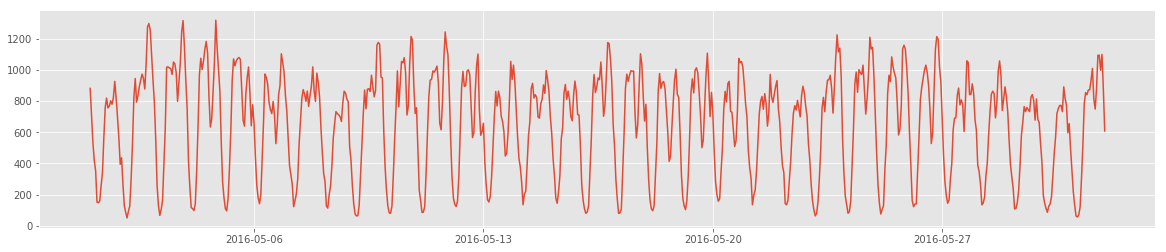

In [142]:
plt.figure(figsize=(20,4))
plt.plot(cr_tab[ESB_region.tolist()[0]].index.tolist(),cr_tab[ESB_region.tolist()[0]].values)

Это график поездок желтого такси из района, где **находится Empire State Building**

Переходим к последнему пункту. Посчитаем количество нулей в таблице. Коротко, процедура делает следующее: по каждому столбцу находим количество поездок равным нулю, единице, двум и т.д. и считаем их количество. Потом складываем эти числа по столбцам.

In [67]:
ser = pd.Series()
for i in range(0,2500,1):
    ser = ser.add(pd.value_counts(cr_tab[i].values, sort=False), fill_value=0)

In [68]:
ser.head()

0    1718238.0
1      39318.0
2      15074.0
3       8979.0
4       6125.0
dtype: float64

Итого, полуичилось, что в мае 2016 было **1718238 пар час-ячейка**, для которых не было совершено ни одной поездки.